In [1]:
!pip install nltk

In [2]:
!pip install -q wordcloud
import wordcloud
import nltk
nltk.download('stopwords')       #words that doesn't impact the sentence
nltk.download('wordnet')         #large word database with 200 language
nltk.download('punkt')           #tokenize a list of sentences
nltk.download('averaged_perceptron_tagger')     #tagging words with their part of speach

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/content/spam.csv', encoding='latin1')


In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [8]:
#dropping unwanted columns
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df.drop(columns=columns_to_drop, inplace=True)

In [9]:
df.shape

(5572, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
print('count of the spam : \n' , df['v1'].value_counts())

count of the spam : 
 v1
ham     4825
spam     747
Name: count, dtype: int64


In [12]:
df['length']=df.v2.str.len()
df.head()

,v1,v2,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
#converting all the values to lower case
df['v2']=df['v2'].str.lower()
df.head()

,v1,v2,length
0,ham,"go until jurong point, crazy.. available only ...",111
1,ham,ok lar... joking wif u oni...,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155
3,ham,u dun say so early hor... u c already then say...,49
4,ham,"nah i don't think he goes to usf, he lives aro...",61


In [14]:
#replace email adresses with 'email'
df['v2']=df['v2'].str.replace(r'^..@+[^\.].*\.[a-z]{2,}$' , 'email')
#replace URLS 'webadresses'
df['v2']=df['v2'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\$*)?$' , 'webadress')
#replace currency symbols with 'moneysym'
df['v2']=df['v2'].str.replace(r'€|\$' , 'dollar')
#replace 10 digit phone  numbers
df['v2']=df['v2'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$' , 'phone')
#replace numeric chards with 'numbers'
df['v2']=df['v2'].str.replace(r'\d+(\-\d+)?' , 'number')

In [15]:
#remove punctuation
df['v2']=df['v2'].str.replace(r'[^w\d\s]' , ' ')
#replace white spaces between sentences with single space
df['v2']=df['v2'].str.replace(r'\s+' , ' ')
#remove leaving and trailling with white space
df['v2']=df['v2'].str.replace(r'^\s+|\s+?$', ' ')

In [16]:
df.head()

,v1,v2,length
0,ham,"go until jurong point, crazy.. available only ...",111
1,ham,ok lar... joking wif u oni...,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155
3,ham,u dun say so early hor... u c already then say...,49
4,ham,"nah i don't think he goes to usf, he lives aro...",61


In [17]:
#removing stopworde
import nltk
import string
from nltk.corpus import stopwords
stop= set(stopwords.words('english')+['u' , 'ü' , 'ur' , '4' , '2' , 'im' , 'dont' , 'doin' , 'ure'])
df['v2']=df['v2'].apply(lambda x : "" .join(term for term in x.split() if term not in stop))

In [18]:
df['cleand_length'] = df.v2.str.len()
df.head()

,v1,v2,length,cleand_length
0,ham,"gojurongpoint,crazy..availablebugisngreatworld...",111,76
1,ham,oklar...jokingwifoni...,29,23
2,spam,freeentrywklycompwinfacupfinaltkts21stmay2005....,155,118
3,ham,dunsayearlyhor...calreadysay...,49,31
4,ham,"nahthinkgoesusf,livesaroundthough",61,33


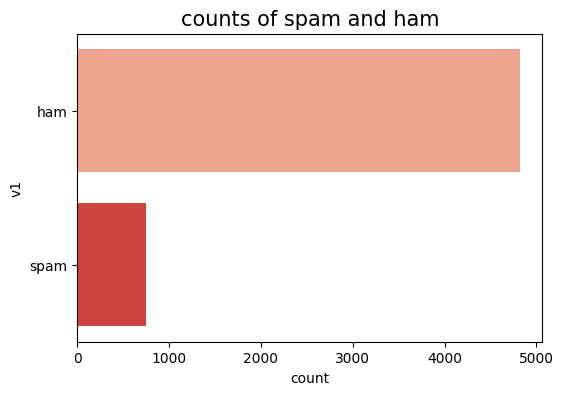

v1
ham     4825
spam     747
Name: count, dtype: int64


In [19]:
plt.figure(figsize=(6,4))
sns.countplot(df['v1'] , palette = 'Reds')
plt.title("counts of spam and ham" , fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()
print(df.v1.value_counts())

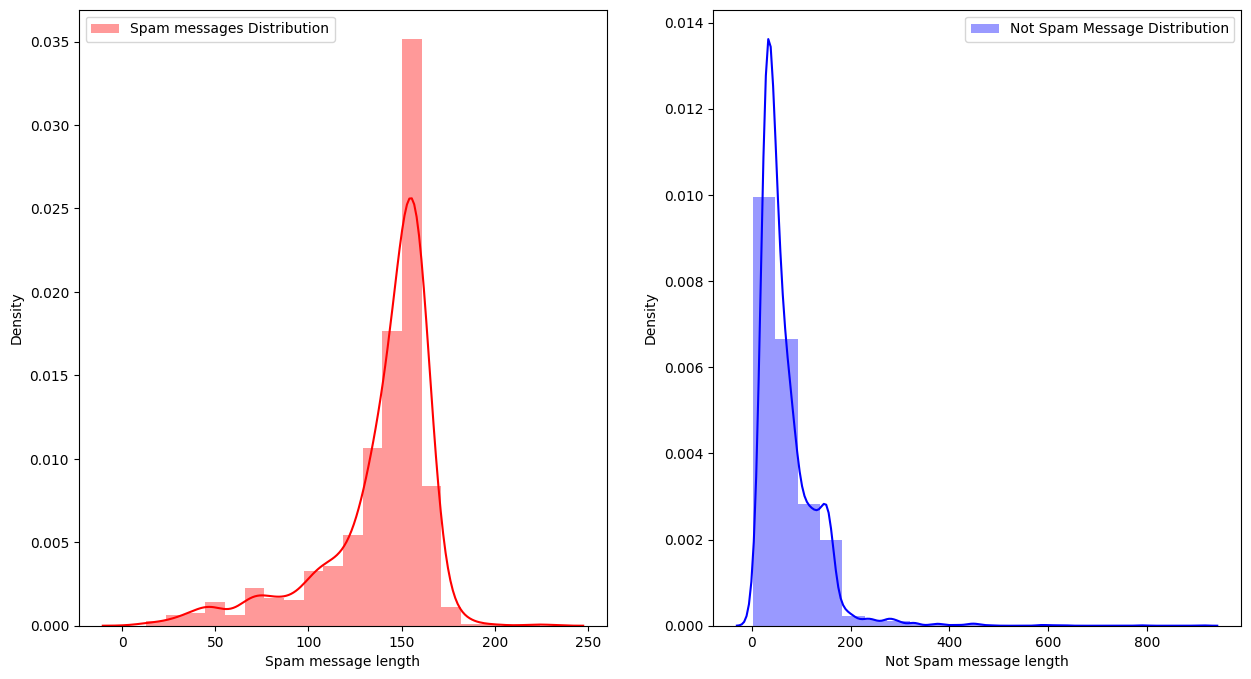

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains the snippet data
# Filter spam and non-spam messages
spam_df = df[df['v1'] == 'spam']
non_spam_df = df[df['v1'] == 'ham']

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(15, 8))

# Plot spam messages distribution
sns.distplot(spam_df['length'], bins=20, ax=ax[0], label='Spam messages Distribution', color='r')
ax[0].set_xlabel('Spam message length')
ax[0].legend()

# Plot non-spam messages distribution
sns.distplot(non_spam_df['length'], bins=20, ax=ax[1], label='Not Spam Message Distribution', color='b')
ax[1].set_xlabel('Not Spam message length')
ax[1].legend()

plt.show()


In [21]:
tf_vec = TfidfVectorizer()
SVM = SVC(C=1.0 , kernel='linear' , degree=3 , gamma = 'auto')
features = tf_vec.fit_transform(df['v2'])
X= features
y=df['v1']

In [22]:
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)
SVM.fit(X_train,Y_train)
y_pred = SVM.predict(x_test)
print('final score = > ' , accuracy_score(y_test , y_pred))

final score = >  0.9425699928212491


In [26]:
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [27]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are your true and predicted labels, respectively
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1202
        spam       0.99      0.59      0.74       191

    accuracy                           0.94      1393
   macro avg       0.96      0.79      0.85      1393
weighted avg       0.95      0.94      0.94      1393



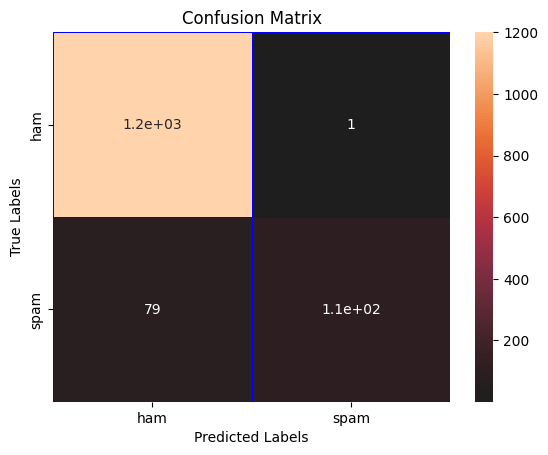

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already defined 'y_test' (true labels) and 'y_pred' (predicted labels)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap
ax = plt.subplot()
sns.heatmap(conf_mat, annot=True, ax=ax, linewidths=.5, linecolor='b', center=0)

# Set labels and title
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

# Set tick labels for x and y axes
ax.xaxis.set_ticklabels(['ham', 'spam'])
ax.yaxis.set_ticklabels(['ham', 'spam'])

# Display the plot
plt.show()
